In [41]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#为了减少迭代次数，我们可以尽量把质心初始化在数据分布的内部
def randCent(data, k):  
    data_min = data.iloc[:, :].min()
    data_max = data.iloc[:, :].max()
    #在最大值和最小值之间随机生成K个质心，返回k*data.shape[1]形状
    data_cent = np.random.uniform(data_min,data_max,(k, data.shape[1]))
    return data_cent 
#计算一个样本到所有质心的距离并且返回最小距离和对应的索引
def one_sample_datacent_distance(one_sample, data_cent):
    one_sample_distance = np.sum(np.power((one_sample.values - data_cent), 2), axis=1)  #一个样本到所有质心的距离
    distance_min_values = one_sample_distance.min()
    distance_min_index  = np.where(one_sample_distance == distance_min_values)
    return distance_min_values, distance_min_index
def kmeans(data,k ):
    m, n = data.shape
    data_cent = randCent(data, k)
    add_3 = np.zeros((m,3))
    add_3[:,0] = np.inf
    add_3[:, 1: 3] = -1
    data_add_3 = pd.concat([data, pd.DataFrame(add_3)] , axis=1, ignore_index = True)
    
    clusterChanged = True #设定一个循环因子，用来控制循环
    while clusterChanged: 
        clusterChanged = False #先更改循环因子，防止陷入死循环
        for i in range(m): 
             #计算当前样本到k个质心的距离
            dist_min_values, dist_min_index = one_sample_datacent_distance(data_add_3.iloc[i, :n], data_cent)
             #将距离的最小值放到容器的第一列（即第n列）
            data_add_3.iloc[i, n] = dist_min_values
            #找到最小距离所在位置的索引即为簇的标号，将簇标号放入容器第二列(即第n+1列)
            data_add_3.iloc[i, n+1] = dist_min_index[0] 
        #判断最后两列是否相等（簇是否还会变化），不相等则进入下一次循环，相等则终止循环    
        clusterChanged = not (data_add_3.iloc[:, -1] == data_add_3.iloc[:, -2]).all()
        #重新计算当前的质心
        if clusterChanged:
            cent_df = data_add_3.groupby(n+1).mean()   #对每个簇进行求均值
            data_cent = cent_df.iloc[:,:n].values  #将均值赋值给质心（确定了新质心）
            data_add_3.iloc[:, -1] = data_add_3.iloc[:, -2] #当前簇标号赋值给最后一列
    return data_cent, data_add_3

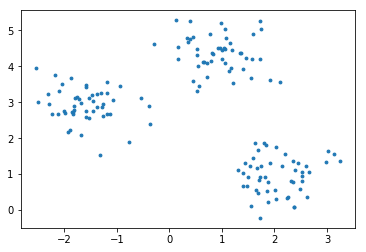

In [34]:
from sklearn.datasets import make_blobs #导入生成数据集的包

#自己创建数据集
X, y = make_blobs(n_samples=150,n_features=2,centers=3,random_state=0,shuffle=True,cluster_std=0.5)

plt.scatter(X[:, 0], X[:, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
           );

In [39]:
test_cent, test_cluster = kmeans(pd.DataFrame(X), 3)


test_cent,test_cluster     #簇中心的位置，以及聚类的分类标签


(array([[ 0.9329651 ,  4.35420712],
        [ 2.06521743,  0.96137409],
        [-1.5947298 ,  2.92236966]]),
             0         1         2    3    4
 0    2.605097  1.225296  0.361125  1.0  1.0
 1    0.532377  3.313389  1.243773  0.0  0.0
 2    0.802314  4.381962  0.017840  0.0  0.0
 3    0.528537  4.497239  0.184020  0.0  0.0
 4    2.618585  0.357698  0.670641  1.0  1.0
 5    1.591415  4.904977  0.736905  0.0  0.0
 6    1.742660  5.038467  1.123817  0.0  0.0
 7    2.375333  0.089186  0.856885  1.0  1.0
 8   -2.121334  2.664474  0.343822  2.0  2.0
 9    1.720396  5.251732  1.425598  0.0  0.0
 10   3.136885  1.565928  1.513957  1.0  1.0
 11  -0.374946  2.387874  1.773559  2.0  2.0
 12  -1.845623  2.719246  0.104206  2.0  2.0
 13   0.721444  4.084750  0.117348  0.0  0.0
 14   0.161171  4.535178  0.628417  0.0  0.0
 15  -1.999127  2.712857  0.207433  2.0  2.0
 16  -1.478042  3.209359  0.095979  2.0  2.0
 17   1.870677  0.777974  0.071482  1.0  1.0
 18  -1.593344  2.768987  0.023528 

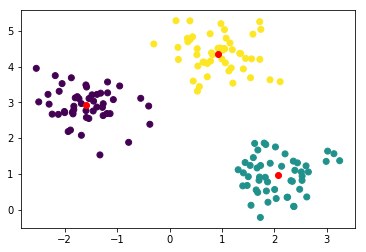

In [37]:

plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])   #绘制样本点
plt.scatter(test_cent[:,0],test_cent[:,1],c='r');   #绘制簇中心